Example 5.3

In [23]:
import numpy as np

# Parameters
n_values = [1, 10, 100, 1000, 10000]  # Different values of n
epsilon = 0.1  # For convergence in probability


# Generate random variables X_n ~ N(0, 1/n)
def generate_Xn(n, size=10000):
    return np.random.normal(0, np.sqrt(1 / n), size)

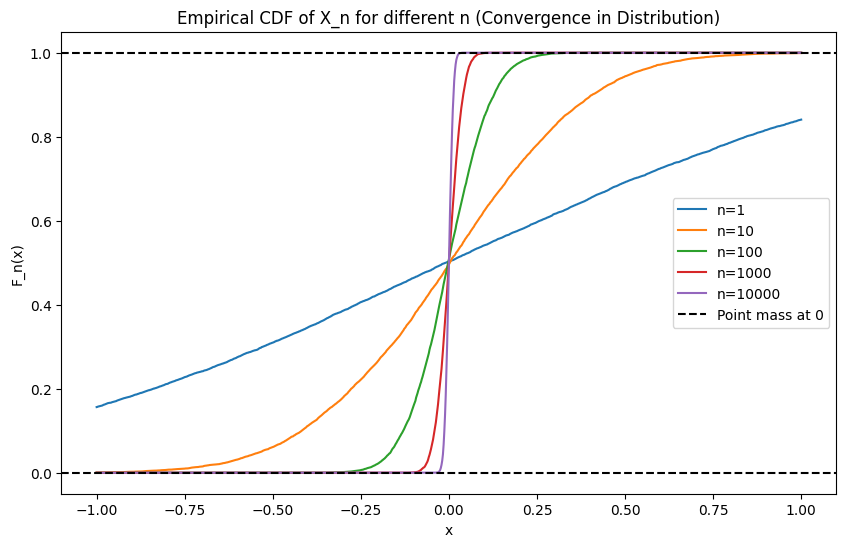

In [27]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

# Convergence in Distribution (Empirical CDF)
plt.figure(figsize=(10, 6))
x = np.linspace(-1, 1, 1000)
for n in n_values:
    Xn = generate_Xn(n)
    ecdf = ECDF(Xn)
    plt.plot(x, ecdf(x), label=f'n={n}')
plt.axhline(1, color='black', linestyle='--', label='Point mass at 0')
plt.axhline(0, color='black', linestyle='--')
plt.title('Empirical CDF of X_n for different n (Convergence in Distribution)')
plt.xlabel('x')
plt.ylabel('F_n(x)')
plt.legend()
plt.show()

For n = 1, P(|X_n| > 0.1) = 0.91460
For n = 10, P(|X_n| > 0.1) = 0.75410
For n = 100, P(|X_n| > 0.1) = 0.31580
For n = 1000, P(|X_n| > 0.1) = 0.00150
For n = 10000, P(|X_n| > 0.1) = 0.00000


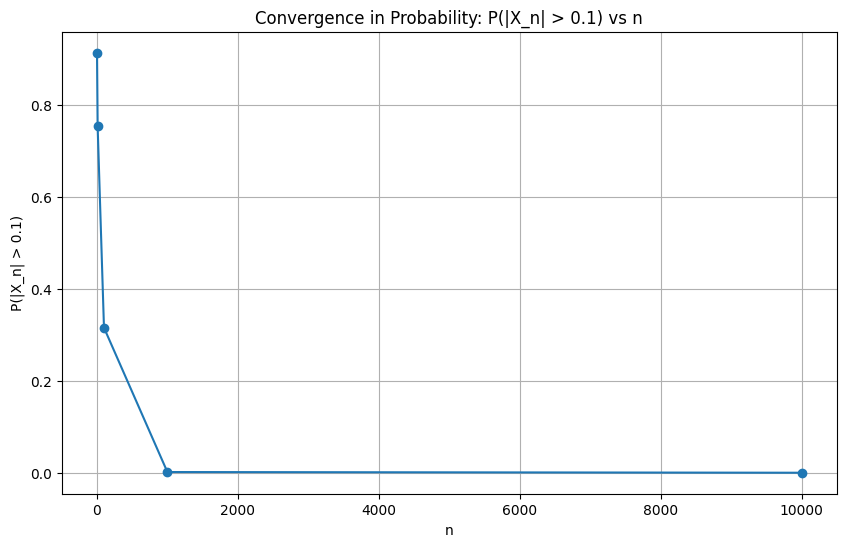

In [28]:
# Convergence in Probability: P(|X_n| > epsilon)
probs = []
for n in n_values:
    Xn = generate_Xn(n)
    prob = np.mean(np.abs(Xn) > epsilon)
    probs.append(prob)
    print(f'For n = {n}, P(|X_n| > {epsilon}) = {prob:.5f}')

plt.figure(figsize=(10, 6))
plt.plot(n_values, probs, marker='o')
plt.title(f'Convergence in Probability: P(|X_n| > {epsilon}) vs n')
plt.xlabel('n')
plt.ylabel(f'P(|X_n| > {epsilon})')
plt.grid(True)
plt.show()

For n = 1, E[X_n^2] = 0.99096
For n = 10, E[X_n^2] = 0.10021
For n = 100, E[X_n^2] = 0.01010
For n = 1000, E[X_n^2] = 0.00101
For n = 10000, E[X_n^2] = 0.00010


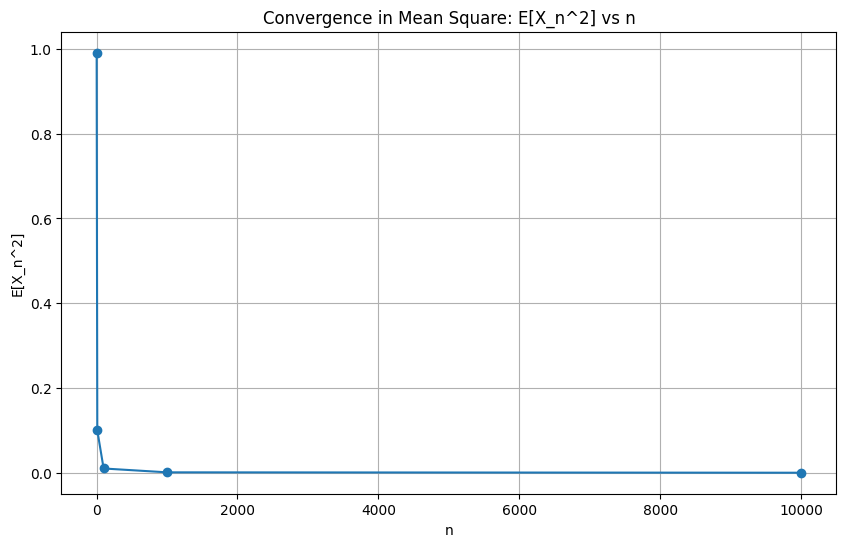

In [29]:
# Convergence in Mean Square: E[X_n^2]
mean_squares = []
for n in n_values:
    Xn = generate_Xn(n)
    mean_square = np.mean(Xn ** 2)
    mean_squares.append(mean_square)
    print(f'For n = {n}, E[X_n^2] = {mean_square:.5f}')

plt.figure(figsize=(10, 6))
plt.plot(n_values, mean_squares, marker='o')
plt.title('Convergence in Mean Square: E[X_n^2] vs n')
plt.xlabel('n')
plt.ylabel('E[X_n^2]')
plt.grid(True)
x
plt.show()

Example 5.7

In [31]:


# Probability of heads
p = 0.5

# Define the target probability threshold and bounds
lower_bound = 0.4
upper_bound = 0.6
target_probability = 0.7


# Function to compute the probability P(lower_bound <= X_n <= upper_bound)
def probability_interval(n, p, lower_bound, upper_bound):
    mean = p
    variance = p * (1 - p) / n
    std_dev = np.sqrt(variance)

    # Z-scores for the bounds
    z_lower = (lower_bound - mean) / std_dev
    z_upper = (upper_bound - mean) / std_dev

    # Compute probability using the standard normal CDF
    return norm.cdf(z_upper) - norm.cdf(z_lower)


# Find the smallest n such that P(.4 <= X_n <= .6) >= 0.7
n = 1
while True:
    prob = probability_interval(n, p, lower_bound, upper_bound)
    if prob >= target_probability:
        break
    n += 1

print(f"The smallest n such that P(.4 <= X_n <= .6) >= 0.7 is: {n}")

The smallest n such that P(.4 <= X_n <= .6) >= 0.7 is: 27


Example 5.9

## Problem Breakdown

**1. Poisson Distribution:**  
The number of errors in each program follows a Poisson distribution with mean 5:
$$
X_i \sim \text{Poisson}(5), \quad \text{for} \ i = 1, 2, \dots, 125.
$$

**2. Total Number of Errors:**  
The total number of errors in all 125 programs is the sum of independent Poisson random variables:
$$
S_n = \sum_{i=1}^{125} X_i \sim \text{Poisson}(125 \times 5) = \text{Poisson}(625).
$$

**3. Average Number of Errors:**  
The average number of errors per program is:
$$
X_n = \frac{S_n}{125}.
$$
Since \( S_n \sim \text{Poisson}(625) \), we want to approximate:
$$
P(X_n < 5.5).
$$

**4. Normal Approximation:**  
Using the Central Limit Theorem, the sum of Poisson-distributed variables can be approximated by a normal distribution:
$$
S_n \sim N(\lambda = 625, \sigma^2 = 625).
$$
The average \( X_n \) can be approximated as:
$$
X_n \sim N\left( \frac{625}{125} = 5, \frac{625}{125^2} = \frac{625}{15625} = \frac{1}{25} \right).
$$
Thus, we have:
$$
X_n \sim N(5, \frac{1}{25}).
$$

**5. Standardizing:**  
We now compute the probability \( P(X_n < 5.5) \):
$$
P(X_n < 5.5) \approx P\left( N(5, \frac{1}{25}) < 5.5 \right).
$$
Standardizing:
$$
P(X_n < 5.5) = P\left( Z < \frac{5.5 - 5}{\sqrt{\frac{1}{25}}} \right) = P\left( Z < \frac{0.5}{0.2} \right) = P(Z < 2.5),
$$
where \( Z \sim N(0, 1).
$$

**6. Using the Normal CDF:**  
Finally, we can use the CDF of the standard normal distribution to approximate \( P(Z < 2.5) \).

In [35]:
from scipy.stats import norm

# Parameters
mean = 5
std_dev = np.sqrt(1 / 25)  # Standard deviation for X_n

# Compute P(X_n < 5.5)
z_value = (5.5 - mean) / std_dev
probability = norm.cdf(z_value)

print(f"P(X_n < 5.5) ≈ {probability:.5f}")

P(X_n < 5.5) ≈ 0.99379


In [33]:
import itertools

def find_combinations(courses_dict, target_credits=45):
    # Separate courses by period
    period1_courses = [(course['course'], course['credits']) for course in courses_dict if course['period'] == 1]
    period2_courses = [(course['course'], course['credits']) for course in courses_dict if course['period'] == 2]

    # Combine period 1 and period 2 courses
    all_courses = period1_courses + period2_courses

    # Create a list to store unique course combinations
    valid_combinations = []

    # Generate all permutations (combinations of any length)
    for r in range(1, len(all_courses) + 1):
        for combination in itertools.permutations(all_courses, r):
            # Flatten the list to ensure correct addition when same course appears in both periods
            unique_courses = {}
            for course, credits in combination:
                if course in unique_courses:
                    unique_courses[course] += credits
                else:
                    unique_courses[course] = credits

            total_credits = sum(unique_courses.values())
            if total_credits == target_credits:
                valid_combinations.append(list(unique_courses.keys()))  # Store the course names

    return valid_combinations


# Example input dictionary
courses = [
    {'period': 1, 'course': 'Data Engineering', 'credits': 5},
    {'period': 1, 'course': 'Deep Learning', 'credits': 5},
    {'period': 1, 'course': 'FDS', 'credits': 10},
    {'period': 1, 'course': 'HPP', 'credits': 10},
    {'period': 2, 'course': 'Reinforcement Learning', 'credits': 5},
    {'period': 2, 'course': 'Topics in Data Science', 'credits': 5},
    {'period': 2, 'course': 'Bayes', 'credits': 10},
    {'period': 2, 'course': 'Time Series', 'credits': 10}
]

# Find and print all valid combinations of courses that sum up to 30 credits
valid_combos = find_combinations(courses)
# for i, combo in enumerate(valid_combos, 1):
#     print(f"Combination {i}: {combo}")

In [34]:
# Define the courses with the condition
course_x = 'FDS'
course_y = 'Topics in Data Science'

# Filter valid_combos where if 'y' is present, 'x' must also be present
filtered_combos = [combo for combo in valid_combos if course_y not in combo or (course_y in combo and course_x in combo)]

In [35]:
len(filtered_combos)

9840

In [36]:
# Remove duplicates by sorting each combination and using a set for uniqueness
unique_combos = set(tuple(sorted(combo)) for combo in filtered_combos)

# Convert back to list if needed
unique_combos = list(unique_combos)

In [37]:
len(unique_combos)

17

In [38]:
unique_combos

[('Bayes', 'FDS', 'HPP', 'Reinforcement Learning', 'Time Series'),
 ('Bayes',
  'Data Engineering',
  'FDS',
  'HPP',
  'Reinforcement Learning',
  'Topics in Data Science'),
 ('Bayes',
  'Data Engineering',
  'Deep Learning',
  'FDS',
  'Time Series',
  'Topics in Data Science'),
 ('Deep Learning',
  'FDS',
  'HPP',
  'Reinforcement Learning',
  'Time Series',
  'Topics in Data Science'),
 ('Bayes', 'Deep Learning', 'FDS', 'HPP', 'Time Series'),
 ('Bayes',
  'Data Engineering',
  'Deep Learning',
  'FDS',
  'HPP',
  'Reinforcement Learning'),
 ('Bayes',
  'Data Engineering',
  'Deep Learning',
  'FDS',
  'HPP',
  'Topics in Data Science'),
 ('Bayes', 'Data Engineering', 'FDS', 'HPP', 'Time Series'),
 ('Data Engineering',
  'FDS',
  'HPP',
  'Reinforcement Learning',
  'Time Series',
  'Topics in Data Science'),
 ('Bayes', 'FDS', 'HPP', 'Time Series', 'Topics in Data Science'),
 ('Bayes',
  'Deep Learning',
  'FDS',
  'Reinforcement Learning',
  'Time Series',
  'Topics in Data Science

In [20]:
import itertools


def find_combinations(courses_dict, target_credits=30):
    # Separate courses by period
    period1_courses = [(course['course'], course['credits']) for course in courses_dict if course['period'] == 1]
    period2_courses = [(course['course'], course['credits']) for course in courses_dict if course['period'] == 2]

    # Combine period 1 and period 2 courses
    all_courses = period1_courses + period2_courses

    # Create a dictionary to store courses that appear in both periods
    courses_in_both_periods = {}
    for course, credits in period1_courses:
        if course in [c[0] for c in period2_courses]:
            courses_in_both_periods[course] = (credits, [c[1] for c in period2_courses if c[0] == course][0])

    # Create a list to store unique course combinations
    valid_combinations = []

    # Generate all permutations (combinations of any length)
    for r in range(1, len(all_courses) + 1):
        for combination in itertools.permutations(all_courses, r):
            # Flatten the list to ensure correct addition when same course appears in both periods
            unique_courses = {}
            for course, credits in combination:
                if course in unique_courses:
                    unique_courses[course] += credits
                else:
                    unique_courses[course] = credits

            # Check if any courses appear in both periods and need to be chosen together
            for course, (credits1, credits2) in courses_in_both_periods.items():
                if course in unique_courses and unique_courses[course] == credits1:
                    unique_courses[course] += credits2
                elif course in unique_courses and unique_courses[course] == credits2:
                    unique_courses[course] += credits1

            total_credits = sum(unique_courses.values())
            if total_credits == target_credits:
                valid_combinations.append(list(unique_courses.keys()))  # Store the course names
    return valid_combinations


# Example input dictionary
courses = [
    {'period': 1, 'course': 'Data Engineering', 'credits': 5},
    {'period': 1, 'course': 'Deep Learning', 'credits': 5},
    {'period': 1, 'course': 'FDS', 'credits': 5},
    {'period': 1, 'course': 'Bayes', 'credits': 5},
    {'period': 1, 'course': 'HPP', 'credits': 10},
    {'period': 2, 'course': 'Reinforcement Learning', 'credits': 5},
    {'period': 2, 'course': 'FDS', 'credits': 5},
    {'period': 2, 'course': 'Topics in Data Science', 'credits': 5},
    {'period': 2, 'course': 'Bayes', 'credits': 5},
    {'period': 2, 'course': 'Time Series', 'credits': 10}
]

# Find and print all valid combinations of courses that sum up to 30 credits
valid_combos = find_combinations(courses)
# for i, combo in enumerate(valid_combos, 1):
#     print(f"Combination {i}: {combo}")

Combination 1: ['FDS', 'Bayes', 'HPP']
Combination 2: ['FDS', 'Bayes', 'Time Series']
Combination 3: ['FDS', 'HPP', 'Bayes']
Combination 4: ['FDS', 'HPP', 'Bayes']
Combination 5: ['FDS', 'HPP', 'Time Series']
Combination 6: ['FDS', 'Bayes', 'HPP']
Combination 7: ['FDS', 'Bayes', 'Time Series']
Combination 8: ['FDS', 'Time Series', 'Bayes']
Combination 9: ['FDS', 'Time Series', 'HPP']
Combination 10: ['FDS', 'Time Series', 'Bayes']
Combination 11: ['Bayes', 'FDS', 'HPP']
Combination 12: ['Bayes', 'FDS', 'Time Series']
Combination 13: ['Bayes', 'HPP', 'FDS']
Combination 14: ['Bayes', 'HPP', 'FDS']
Combination 15: ['Bayes', 'HPP', 'Time Series']
Combination 16: ['Bayes', 'FDS', 'HPP']
Combination 17: ['Bayes', 'FDS', 'Time Series']
Combination 18: ['Bayes', 'Time Series', 'FDS']
Combination 19: ['Bayes', 'Time Series', 'HPP']
Combination 20: ['Bayes', 'Time Series', 'FDS']
Combination 21: ['HPP', 'FDS', 'Bayes']
Combination 22: ['HPP', 'FDS', 'Bayes']
Combination 23: ['HPP', 'FDS', 'Time 

In [13]:
valid_combos

[['Data Engineering', 'Deep Learning', 'HPP', 'Time Series'],
 ['Data Engineering', 'Deep Learning', 'Time Series', 'HPP'],
 ['Data Engineering', 'FDS', 'HPP', 'Time Series'],
 ['Data Engineering', 'FDS', 'Time Series', 'HPP'],
 ['Data Engineering', 'Bayes', 'HPP', 'Time Series'],
 ['Data Engineering', 'Bayes', 'Time Series', 'HPP'],
 ['Data Engineering', 'HPP', 'Deep Learning', 'Time Series'],
 ['Data Engineering', 'HPP', 'FDS', 'Time Series'],
 ['Data Engineering', 'HPP', 'Bayes', 'Time Series'],
 ['Data Engineering', 'HPP', 'Reinforcement Learning', 'Time Series'],
 ['Data Engineering', 'HPP', 'FDS', 'Time Series'],
 ['Data Engineering', 'HPP', 'Topics in Data Science', 'Time Series'],
 ['Data Engineering', 'HPP', 'Bayes', 'Time Series'],
 ['Data Engineering', 'HPP', 'Time Series', 'Deep Learning'],
 ['Data Engineering', 'HPP', 'Time Series', 'FDS'],
 ['Data Engineering', 'HPP', 'Time Series', 'Bayes'],
 ['Data Engineering', 'HPP', 'Time Series', 'Reinforcement Learning'],
 ['Data E

In [22]:
filtered_combos

[['FDS', 'Bayes', 'HPP'],
 ['FDS', 'Bayes', 'Time Series'],
 ['FDS', 'HPP', 'Bayes'],
 ['FDS', 'HPP', 'Bayes'],
 ['FDS', 'HPP', 'Time Series'],
 ['FDS', 'Bayes', 'HPP'],
 ['FDS', 'Bayes', 'Time Series'],
 ['FDS', 'Time Series', 'Bayes'],
 ['FDS', 'Time Series', 'HPP'],
 ['FDS', 'Time Series', 'Bayes'],
 ['Bayes', 'FDS', 'HPP'],
 ['Bayes', 'FDS', 'Time Series'],
 ['Bayes', 'HPP', 'FDS'],
 ['Bayes', 'HPP', 'FDS'],
 ['Bayes', 'HPP', 'Time Series'],
 ['Bayes', 'FDS', 'HPP'],
 ['Bayes', 'FDS', 'Time Series'],
 ['Bayes', 'Time Series', 'FDS'],
 ['Bayes', 'Time Series', 'HPP'],
 ['Bayes', 'Time Series', 'FDS'],
 ['HPP', 'FDS', 'Bayes'],
 ['HPP', 'FDS', 'Bayes'],
 ['HPP', 'FDS', 'Time Series'],
 ['HPP', 'Bayes', 'FDS'],
 ['HPP', 'Bayes', 'FDS'],
 ['HPP', 'Bayes', 'Time Series'],
 ['HPP', 'FDS', 'Bayes'],
 ['HPP', 'FDS', 'Bayes'],
 ['HPP', 'FDS', 'Time Series'],
 ['HPP', 'Bayes', 'FDS'],
 ['HPP', 'Bayes', 'FDS'],
 ['HPP', 'Bayes', 'Time Series'],
 ['HPP', 'Time Series', 'FDS'],
 ['HPP', 'Time S

In [23]:
len(filtered_combos)

12384

In [24]:
# Remove duplicates by sorting each combination and using a set for uniqueness
unique_combos = set(tuple(sorted(combo)) for combo in filtered_combos)

# Convert back to list if needed
unique_combos = list(unique_combos)

In [26]:
unique_combos

[('Bayes', 'Data Engineering', 'FDS', 'Topics in Data Science'),
 ('Data Engineering', 'FDS', 'Reinforcement Learning', 'Time Series'),
 ('Deep Learning', 'HPP', 'Reinforcement Learning', 'Time Series'),
 ('Bayes', 'Deep Learning', 'HPP', 'Reinforcement Learning'),
 ('Bayes', 'HPP', 'Time Series'),
 ('FDS', 'HPP', 'Time Series'),
 ('Bayes', 'Data Engineering', 'HPP', 'Reinforcement Learning'),
 ('Data Engineering', 'Deep Learning', 'HPP', 'Time Series'),
 ('FDS', 'HPP', 'Reinforcement Learning', 'Topics in Data Science'),
 ('Bayes', 'Deep Learning', 'FDS', 'Reinforcement Learning'),
 ('Bayes', 'FDS', 'Time Series'),
 ('Bayes', 'FDS', 'Reinforcement Learning', 'Topics in Data Science'),
 ('Data Engineering', 'FDS', 'HPP', 'Reinforcement Learning'),
 ('Deep Learning', 'FDS', 'HPP', 'Topics in Data Science'),
 ('Bayes', 'Data Engineering', 'Deep Learning', 'Time Series'),
 ('Bayes', 'Data Engineering', 'FDS', 'Reinforcement Learning'),
 ('FDS', 'Reinforcement Learning', 'Time Series', 'To

In [25]:
len(unique_combos)

32

In [ ]:
# Print the number of unique combinations
print(f"Number of unique combinations: {len(unique_combos)}")

In [ ]:
# Print the number of unique combinations
print(f"Number of unique combinations: {len(unique_combos)}"